## Author: Ong Aun Ter ##

# Cinema Popularity in Malaysia #


I retrieved data about cinemas in Malaysia from Twitter using Twitter Scraper package. 

This dataset have the top 4 cinema operators in Malaysia as a data point (47569 tweets in total), and for each, we have 21 columns, each column represents a different aspect or measure of the specific tweet.

The goal of the project is to understand this dataset, get some insights from it, and to improve my data analysis/manipulation skill set using Python.



### Brief background information about cinemas in Malaysia and Twitter ### 

There are 5 major cinemas operator and their respective launched date in Malaysia, which are TGV (2006), GSC (2007), MBO (2003), Lotus FIVESTAR (2004) and mmCineplex (2008). In our analysis, we only use scraped twitter data from all of the above except for Lotus FIVESTAR because the amount scraped was insignificant compared to the other cinemas (not enough people tweeting about Lotus FiveSTAR in Malaysia. 

## Scraping data from twitter ## 

In [ ]:
#import relevant packages for scraping tweets
from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

In [ ]:
#Specify the date range, language and query to extract tweets
begin_date = dt.date(2010,1,1)
end_date = dt.date(2020,5,27)

#limit of tweets
limit = 15000

#language
lang = 'English', 'Malay'

#content of tweet to retrieve and specify which country the tweets should be from
query = "TGV", "GSC", "MBO", "CINEMAS":near Malaysia 

#Query
tweets = query_tweets(query, begindate = begin_date, enddate = end_date, limit = limit, lang = lang)

#put the tweets into a dataframe
df = pd.DataFrame(t.__dict__ for t in tweets)

#exporting the content to a csv file
df.to_csv(r'filepath')



# Get ready for data analysis/manipulation #

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Data Import #

## Merging multiple CSV into one ##

In [49]:
#specifiy a file directory 
files = [file for file in os.listdir(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\Location Malaysia')]

#making a empty data frame
all_cinemas_data = pd.DataFrame() 

#using for loop to merge the CSV files
#Add a "/" at the end of the file path
#Normal directory, don't have to add a "/", only add when you want to read CSV files

for file in files: 
    df = pd.read_csv("C:/Users/aunte/Desktop/Data science/Scraping Data/Cinema/Location Malaysia/"+ file)
    all_cinemas_data = pd.concat([all_cinemas_data, df])

#make a new csv of the merged files 

all_cinemas_data.to_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\Location Malaysia\all_cinemas_merged.csv', index = False)

# Data Description#

##### Show data header #####

In [3]:
df = pd.read_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\Location Malaysia\all_cinemas_merged.csv')
df.head(3)
#tweets from TGV, GSC and MBO are merged into a single data frame 
#further into this project we will separate them into their unique columns

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,/faizulreza/status/94833042807455744,2011-07-23 18:15:33,1311444933,Watching hanna td! (@ Golden Screen Cinemas (G...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
1,1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,/ZahidMansor/status/94827564509569024,2011-07-23 17:53:47,1311443627,Harry Potter... again!!! (@ Golden Screen Cine...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
2,2,hariznasir,Judas | Ayeh,95462928,94804012347572224,/hariznasir/status/94804012347572224,2011-07-23 16:20:12,1311438012,Finally gonna watch HP (@ Golden Screen Cinema...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]


##### Data information ####

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47599 entries, 0 to 47598
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47599 non-null  int64  
 1   screen_name       47599 non-null  object 
 2   username          47579 non-null  object 
 3   user_id           47599 non-null  int64  
 4   tweet_id          47599 non-null  int64  
 5   tweet_url         47599 non-null  object 
 6   timestamp         47599 non-null  object 
 7   timestamp_epochs  47599 non-null  int64  
 8   text              47593 non-null  object 
 9   text_html         47599 non-null  object 
 10  links             47599 non-null  object 
 11  hashtags          47599 non-null  object 
 12  has_media         47599 non-null  bool   
 13  img_urls          47599 non-null  object 
 14  video_url         0 non-null      float64
 15  likes             47599 non-null  int64  
 16  retweets          47599 non-null  int64 

##### Check for null values ##### 

In [4]:
#Find row with null values
df.isnull().any(axis = 1) #not very practical for dataset with so many rows

0        True
1        True
2        True
3        True
4        True
         ... 
47594    True
47595    True
47596    True
47597    True
47598    True
Length: 47599, dtype: bool

In [5]:
#Find percentage of null values
df.isnull().sum()/ df.shape[0] 

Unnamed: 0          0.000000
screen_name         0.000000
username            0.000420
user_id             0.000000
tweet_id            0.000000
tweet_url           0.000000
timestamp           0.000000
timestamp_epochs    0.000000
text                0.000126
text_html           0.000000
links               0.000000
hashtags            0.000000
has_media           0.000000
img_urls            0.000000
video_url           1.000000
likes               0.000000
retweets            0.000000
replies             0.000000
is_replied          0.000000
is_reply_to         0.000000
parent_tweet_id     0.980042
reply_to_users      0.000000
dtype: float64

[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

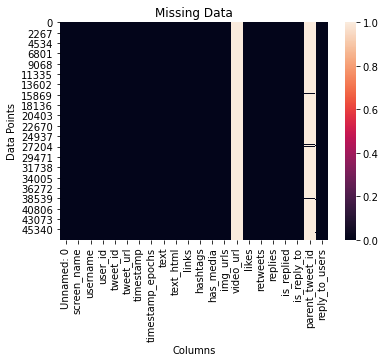

In [6]:
#Visualizing missing values in the dataset

sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

From the heatmap above, it is clear that video_url and parent_tweets_id has extensive missing data points. 4/21 of our columns have missing data points, the maximum percentage of missing data is in the "video_url" column at 100% missing data, the lowest percentage 0.01% of missing data. 

As we progress with this project, we will perform data cleaning to deal with the null values. 

## Data Cleaning ##

### Missing values ###

In [535]:
print(df.isnull().sum())

Unnamed: 0              0
screen_name             0
username               20
user_id                 0
tweet_id                0
tweet_url               0
timestamp               0
timestamp_epochs        0
text                    6
text_html               0
links                   0
hashtags                0
has_media               0
img_urls                0
video_url           47599
likes                   0
retweets                0
replies                 0
is_replied              0
is_reply_to             0
parent_tweet_id     46649
reply_to_users          0
dtype: int64


let's look into which column has the most empty datapoints. 

1. "username" has 20 null values, we can probably keep it in, since username has nothing to do with our analysis. 
2. "video_url" and "parent_tweet_id" both have almost 100% null values, thus we can completely remove these two columns
3. "text" column has 6 null values, we can remove them since the amount is quite insignificant. 


In [7]:
#Removing the na values

df = df[df['username'].notna()]
print(df.isnull().sum())

Unnamed: 0              0
screen_name             0
username                0
user_id                 0
tweet_id                0
tweet_url               0
timestamp               0
timestamp_epochs        0
text                    6
text_html               0
links                   0
hashtags                0
has_media               0
img_urls                0
video_url           47579
likes                   0
retweets                0
replies                 0
is_replied              0
is_reply_to             0
parent_tweet_id     46630
reply_to_users          0
dtype: int64


In [8]:
#Since video_url and parent_tweet_id are almost 100% null, we can just drop the columns 

df = df.drop(columns = ['video_url', 'parent_tweet_id'])

#check whether the columns have been removed
df.columns

Index(['Unnamed: 0', 'screen_name', 'username', 'user_id', 'tweet_id',
       'tweet_url', 'timestamp', 'timestamp_epochs', 'text', 'text_html',
       'links', 'hashtags', 'has_media', 'img_urls', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'reply_to_users'],
      dtype='object')

In [9]:
#While we're removing columns, let's also remove columns that wont be useful to us 
df = df.drop(columns = ['Unnamed: 0', 'tweet_url', 'timestamp_epochs', 'text_html', 'links', 
                       'has_media', 'img_urls', 'replies', 'is_replied', 'is_reply_to', 'reply_to_users'])
df.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'timestamp', 'text',
       'hashtags', 'likes', 'retweets'],
      dtype='object')

In [10]:
df = df[df['text'].notna()]
print(df.isnull().sum())

screen_name    0
username       0
user_id        0
tweet_id       0
timestamp      0
text           0
hashtags       0
likes          0
retweets       0
dtype: int64


In [110]:
#Check the data shape see if I removed too many rows
df.shape

(47573, 9)

In [11]:
#check for duplicated rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets
20,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23 18:15:33,Watching hanna td! (@ Golden Screen Cinemas (G...,[],0,0
21,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23 17:53:47,Harry Potter... again!!! (@ Golden Screen Cine...,[],0,0
22,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23 16:20:12,Finally gonna watch HP (@ Golden Screen Cinema...,[],0,0
23,simcom86,Simon Shu,224500513,94797119575166976,2011-07-23 15:52:49,Harry Potter 7 again... =) (@ Golden Screen Ci...,[],0,0
24,tanco,tanco,7935272,94796574017847296,2011-07-23 15:50:39,"I'm at Golden Screen Cinemas (GSC) (3rd Floor,...",[],0,0
...,...,...,...,...,...,...,...,...,...
46815,Childish_Boys,Childish Boy,2233091768,714062872331034624,2016-03-27 12:13:50,Second Round ~ @ TGV Sunway Pyranid https://ww...,[],0,0
46816,rudyffnd,rudy,390142695,714049209033441282,2016-03-27 11:19:32,allegiant again or batman v superman hmph (@ T...,[],0,0
46817,amierasahari,Amie,44330387,714041650893496320,2016-03-27 10:49:30,"Zootopia (@ TGV Cinemas in Petaling Jaya, Sela...",[],0,0
46818,shyyawn,Shayan Haque,20396996,714041221166022656,2016-03-27 10:47:48,Batman vs Superman #imax #movie #batman #kuala...,"['imax', 'movie', 'batman', 'kualalumpur', 'ma...",0,0


We can see that we have 1305 duplicated rows. Best to remove them to improve the quality of our dataset.

In [12]:
#remove duplicated rows
df.drop_duplicates(inplace= True)   
df.shape
#removed 1305 rows

(46268, 9)

In [13]:
#Last check for null data before moving to exploratory data analysis

print(df.isnull().sum())

screen_name    0
username       0
user_id        0
tweet_id       0
timestamp      0
text           0
hashtags       0
likes          0
retweets       0
dtype: int64


#### Datetime ###

In [14]:
#Keeping only the time from the 'timestamp' column
df['Time of day'] = pd.to_datetime(df['timestamp']).dt.time
df.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23 18:15:33,Watching hanna td! (@ Golden Screen Cinemas (G...,[],0,0,18:15:33
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23 17:53:47,Harry Potter... again!!! (@ Golden Screen Cine...,[],0,0,17:53:47
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23 16:20:12,Finally gonna watch HP (@ Golden Screen Cinema...,[],0,0,16:20:12


In [15]:
#separate the time into their own specific column
df[['h','m','s']] = df['Time of day'].astype(str).str.split(':', expand=True).astype(int)
df.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23 18:15:33,Watching hanna td! (@ Golden Screen Cinemas (G...,[],0,0,18:15:33,18,15,33
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23 17:53:47,Harry Potter... again!!! (@ Golden Screen Cine...,[],0,0,17:53:47,17,53,47
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23 16:20:12,Finally gonna watch HP (@ Golden Screen Cinema...,[],0,0,16:20:12,16,20,12


In [16]:
#See at which our has the most tweets
count = df['h'].value_counts()
count

13    5514
14    4804
12    4775
15    3830
8     3440
7     3026
9     2910
6     2862
10    2848
11    2803
16    2498
5     2076
3     1342
4     1309
2      699
17     669
18     291
1      227
19     108
0       86
23      49
20      45
21      30
22      27
Name: h, dtype: int64

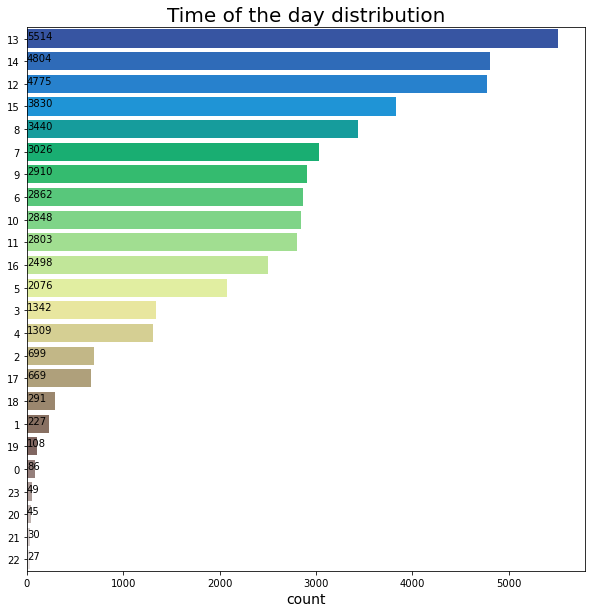

In [17]:
#Creating a function to plot the bar graphs

def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()


drawbarplot(x=count.values,y=count.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

I would say around lunch hour tweets about cinemas is the highest. Weird values would be at early morning 7-9am has a lot of tweets about cinemas. Let's filter our dataframe and look at what people are tweeting at that hour

In [196]:
#filter hour to 7am only 
hour_7am = df.loc[(df['h'] == 7)]
hour_7am['text'].head(3)

42    Flat 3A (@ Golden Screen Cinemas (GSC)) http:/...
43    I'm at Golden Screen Cinemas (GSC) (Cheras Lei...
44    The Hangover Part 2 (@ Golden Screen Cinemas (...
Name: text, dtype: object

It appears that people are actually checking in at the respective cinemas at ungodly hours. Before further judging and being a keyboard warrior, I've decided to google the operating hours and looked into the ticket showtimes of each cinemas. The hours are not correct, 7 supposed to be 19, 7 supposed to be 18, explains why in figure 1, the tweets at 18, 19 are so low. 

In [554]:
#perform conditional changes to the data
#first let's, create a new dataframe, then we will still have the orignal intact
# i.e new checkpoint
df_v2 = df

In [550]:
df_v2.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23 18:15:33,Watching hanna td! (@ Golden Screen Cinemas (GSC) w/ 4 others) http://4sq.com/qWdWrv,[],0,0,18:15:33,18,15,33
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23 17:53:47,Harry Potter... again!!! (@ Golden Screen Cinemas (GSC) Signature w/ @i3thchild) http://4sq.com/qkPaBR,[],0,0,17:53:47,17,53,47
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23 16:20:12,Finally gonna watch HP (@ Golden Screen Cinemas (GSC) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,16,20,12


In [555]:
#change the times 
df_v2['h'].replace(7, 19, inplace = True)
df_v2['h'].replace(8, 20, inplace = True)
df_v2['h'].replace(6, 18, inplace = True)
df_v2['h'].replace(10, 22, inplace = True)
df_v2['h'].replace(11, 23, inplace = True)
df_v2['h'].replace(5, 17, inplace = True)
df_v2['h'].replace(3, 15, inplace = True)
df_v2['h'].replace(4, 16, inplace = True)
df_v2['h'].replace(9, 21, inplace = True)



In [547]:
#check whether if changed succesfully 
hour_6am_check = df_v2.loc[(df_v2['h'] == 6)]
hour_6am_check
#no values displayed means there are 6am tweets anymore
#can probably use a for loop, and return false everytime if the hour is not found

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s


In [556]:
#lets plot the time distribution again
count_v2 = df_v2['h'].value_counts()
count_v2

13    5514
15    5172
14    4804
12    4775
16    3807
20    3485
18    3153
19    3134
21    2940
22    2875
23    2852
17    2745
2      699
1      227
0       86
Name: h, dtype: int64

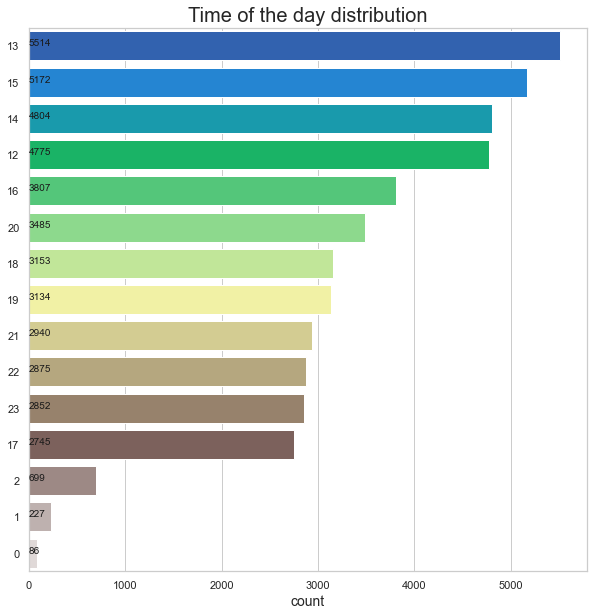

In [557]:
drawbarplot(x=count_v2.values,y=count_v2.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

Removed early morning hours, now nobody goes to the cinemas in the early morning. Statistics  = lies? reality manipulation? 

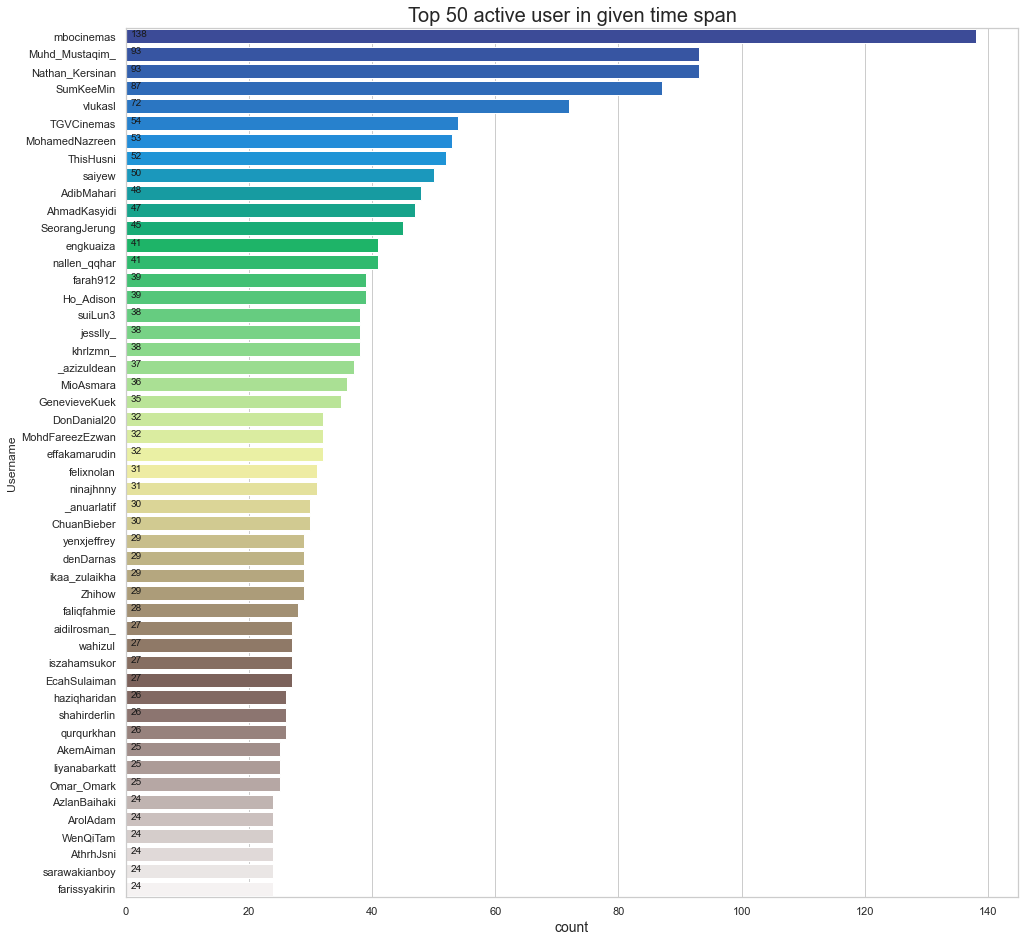

In [561]:
#Now lets look at most active twitter users in the given timeperiod, in our case == 10 years
count=df_v2['screen_name'].value_counts()
df_count=pd.DataFrame()
df_count['Username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.Username,xlabel='count',title='Top 50 active user in given time span',
            figsize=(16,16))


Some insights on who's the most active tweeting about cinemas

Looks like MBO cinemas has hired a very active social media personnel! TGV and GSC should follow suit! 
I've checked the other individuals twitter account, they are all hardcore movie goers. 

In [310]:
#to find out whether the column contains specific description
df_v2.loc[df_v2['screen_name'].str.contains('gsc')]

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s
34929,calvingsc,Calvin Goh,35058662,353180181793476609,2013-07-05 15:54:51,Can't get enough of the #despicableme2 #minion...,"['despicableme2', 'minions']",0,0,15:54:51,15,54,51


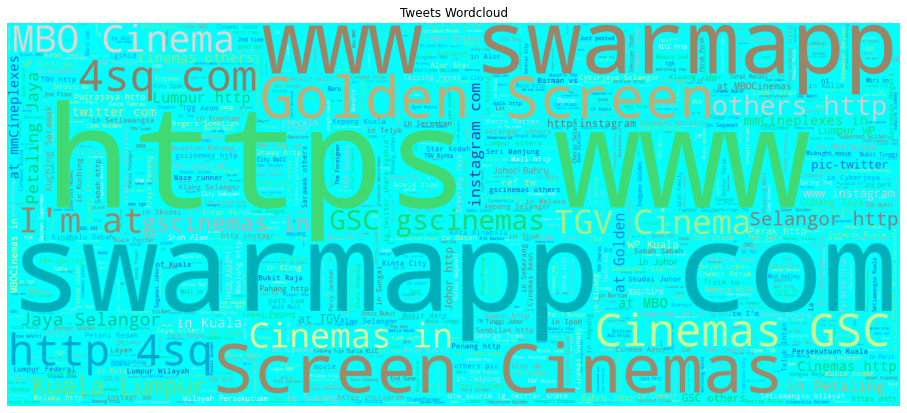

In [319]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df_v2['text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

#there are a bunch of words that we dont want to see. we can remove them by using stopwords

Looks like there's a lot of unnessary words in our word cloud such as https, swarmapp, www ... 
We should remove them. 

In [351]:
#convert all string to lowercase letter for easier manipulation
df_v2['text'] = df['text'].apply(lambda x: x.lower())

In [356]:
st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['https','via','amp','place','new',
                 'ttot','4sq','com','swarmapp','ht','cinema','http', 'cinemas', 'others', 'in', 'screen', 'at'])

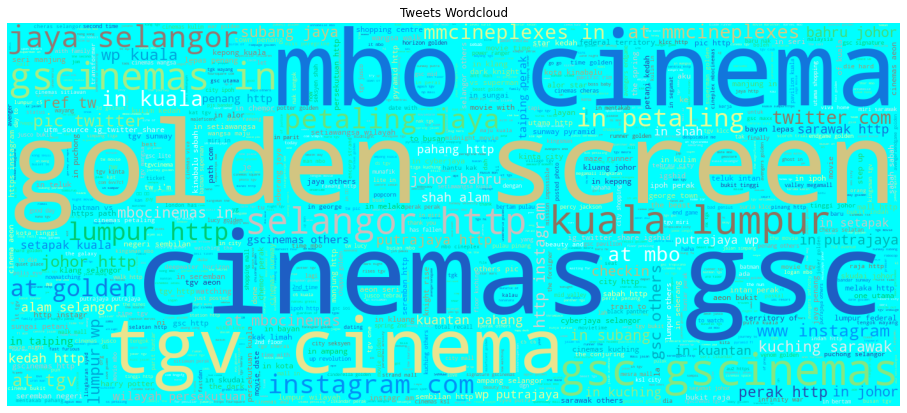

In [357]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000, stopwords = st_words, colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df_v2['text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

I see a lot of major cities mentioned, like Kuala Lumpur, Johor and petaling jaya. 
Funny how instagram is so active in Malaysia's cinemas scene. A lot of people probably linked their twitter account to their instagram account.

Looks like GSC is mentioned the most in our dataset

## Time series ## 

In [358]:
#check how our dataset looks like again. Good to do this frequently so that less probability for unwanted mistakes
df_v2.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23 18:15:33,watching hanna td! (@ golden screen cinemas (g...,[],0,0,18:15:33,18,15,33
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23 17:53:47,harry potter... again!!! (@ golden screen cine...,[],0,0,17:53:47,17,53,47
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23 16:20:12,finally gonna watch hp (@ golden screen cinema...,[],0,0,16:20:12,16,20,12


## Annual or monthly time series? ##

Since we have 10 years, makes sense to do annual instead of monthly, we can dive in deeper into monthly time series if we want

First, let's retrieve only the year in the timestamp column

In [562]:
df_v2['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
df_v2.head(3)
#the time is removed

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23,Watching hanna td! (@ Golden Screen Cinemas (GSC) w/ 4 others) http://4sq.com/qWdWrv,[],0,0,18:15:33,18,15,33
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23,Harry Potter... again!!! (@ Golden Screen Cinemas (GSC) Signature w/ @i3thchild) http://4sq.com/qkPaBR,[],0,0,17:53:47,17,53,47
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23,Finally gonna watch HP (@ Golden Screen Cinemas (GSC) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,16,20,12


In [563]:
#Just like what we did for time column, we can also separate the date to Year, month and date
df_v2[['year','month','date']] = df_v2['timestamp'].astype(str).str.split('-', expand=True).astype(int)
df_v2.head(3)


,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s,year,month,date
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23,Watching hanna td! (@ Golden Screen Cinemas (GSC) w/ 4 others) http://4sq.com/qWdWrv,[],0,0,18:15:33,18,15,33,2011,7,23
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23,Harry Potter... again!!! (@ Golden Screen Cinemas (GSC) Signature w/ @i3thchild) http://4sq.com/qkPaBR,[],0,0,17:53:47,17,53,47,2011,7,23
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23,Finally gonna watch HP (@ Golden Screen Cinemas (GSC) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,16,20,12,2011,7,23


In [566]:
#separate the cinemas, we have TGV, GSC, MBO and mmcineplexe
df_v2['TGV'] = df['text'].apply(lambda x: 1 if 'tgv' in x.lower() else 0)
df_v2['GSC'] = df['text'].apply(lambda x: 1 if 'gsc' in x.lower() else 0)
df_v2['MBO'] = df['text'].apply(lambda x: 1 if 'mbo' in x.lower() else 0)
df_v2['cineplex'] = df['text'].apply(lambda x: 1 if 'cineplex' in x.lower() else 0)

In [567]:
df_v2.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s,year,month,date,TGV,GSC,MBO,cineplex
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23,Watching hanna td! (@ Golden Screen Cinemas (GSC) w/ 4 others) http://4sq.com/qWdWrv,[],0,0,18:15:33,18,15,33,2011,7,23,0,1,0,0
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23,Harry Potter... again!!! (@ Golden Screen Cinemas (GSC) Signature w/ @i3thchild) http://4sq.com/qkPaBR,[],0,0,17:53:47,17,53,47,2011,7,23,0,1,0,0
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23,Finally gonna watch HP (@ Golden Screen Cinemas (GSC) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,16,20,12,2011,7,23,0,1,0,0


As you can see, I've created a new column for each of the cinemas, and whenever the word TGV is mentioned in the tweet text, the column will have a value of '1'. This will help with easier data analysis and manipulation of our dataframe as you can see below.

In [568]:
#By giving the values 1, we can perform analysis such as this.
TGV = df_v2.loc[(df_v2['TGV'] == 1)]
TGV.head(3)
TGV_to_df = TGV.groupby(['year']).count()['TGV']
TGV_df = pd.DataFrame(TGV_to_df)
TGV_df

,TGV
year,
2010,396
2011,1104
2012,1469
2013,1750
2014,1450
2015,1574
2016,1581
2017,1521
2018,1440


In [400]:
GSC = df_v2.loc[(df_v2['GSC'] == 1)]
GSC_to_df = GSC.groupby(['year']).count()['GSC']
GSC_df = pd.DataFrame(GSC_to_df)
GSC_df

,GSC
year,
2010,565
2011,1039
2012,1609
2013,1580
2014,1588
2015,1539
2016,1545
2017,1522
2018,1447


In [401]:
MBO = df_v2.loc[(df_v2['MBO'] == 1)]
MBO.head(3)
MBO_to_df = MBO.groupby(['year']).count()['MBO']
MBO_df = pd.DataFrame(MBO_to_df)
MBO_df

,MBO
year,
2010,64
2011,558
2012,1105
2013,1672
2014,1748
2015,1423
2016,1861
2017,1906
2018,1826


In [412]:
cineplex = df_v2.loc[(df['cineplex'] == 1)]
cineplex_to_df = cineplex.groupby(['year']).count()['cineplex']
cineplex_df = pd.DataFrame(cineplex_to_df)
cineplex_df

,cineplex
year,
2010,1
2011,1
2012,17
2013,16
2014,6
2015,1
2016,371
2017,1464
2018,1109


In [404]:
#Since we've got the individual cinema's number of tweets. But the problem is they are not in the same dataframe. 
#Let's merge them into a single data frame
#First we put them into a list called frames.
frames = [TGV_df, MBO_df, GSC_df, cineplex_df]

In [455]:
#We use the pandas concat function to merge them together
all_cinema_timeseries = pd.concat(frames)
all_cinema_timeseries.head(3)

,TGV,MBO,GSC,cineplex
year,,,,
2010,396.0,NaN,NaN,NaN
2011,1104.0,NaN,NaN,NaN
2012,1469.0,NaN,NaN,NaN


As you can see, they are not merged correctly. 

In [569]:
#we will use the code below to sort them nicely then export them into csv. 
#It is always better to have backups!
Better_ts_all_cinemas = pd.concat([TGV_df, MBO_df, GSC_df, cineplex_df], axis=1, sort=False)
Better_ts_all_cinemas.to_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\better_ts_all_cinemas.csv')

In [570]:
#need to melt first before plotting 
to_melt_cinema = pd.read_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\better_ts_all_cinemas.csv')
to_melt_cinema

,year,TGV,MBO,GSC,cineplex
0,2010,396,64,565,1
1,2011,1104,558,1039,1
2,2012,1469,1105,1609,17
3,2013,1750,1672,1580,16
4,2014,1450,1748,1588,6
5,2015,1574,1423,1539,1
6,2016,1581,1861,1545,371
7,2017,1521,1906,1522,1464
8,2018,1440,1826,1447,1109
9,2019,1564,1688,1849,581


In [572]:
melted_cinemas_ts = pd.melt(to_melt_cinema, ['year'])
melted_cinemas_ts.head(3)

,year,variable,value
0,2010,TGV,396
1,2011,TGV,1104
2,2012,TGV,1469


[Text(0, 0.5, 'Number of tweets'), Text(0.5, 0, 'Year')]

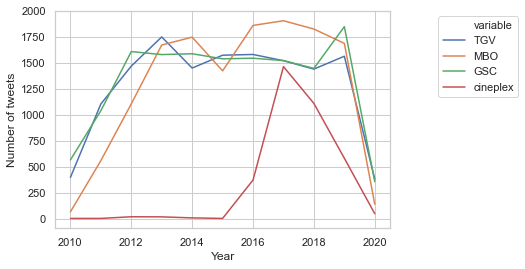

In [573]:
c = sns.lineplot('year', 'value', hue='variable',
             data= melted_cinemas_ts)

c.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
c.set(xlabel='Year', ylabel='Number of tweets')

all of the data points have a big drop at year 2020. Since year 2020 is not even half way done and the fact that its impacted by covid-19. We can safely remove all data points of year 2020 from our dataset.

In [580]:
#removing the row with year 2020
to_melt_cinema = to_melt_cinema.drop([10])
to_melt_cinema

,year,TGV,MBO,GSC,cineplex
0,2010,396,64,565,1
1,2011,1104,558,1039,1
2,2012,1469,1105,1609,17
3,2013,1750,1672,1580,16
4,2014,1450,1748,1588,6
5,2015,1574,1423,1539,1
6,2016,1581,1861,1545,371
7,2017,1521,1906,1522,1464
8,2018,1440,1826,1447,1109
9,2019,1564,1688,1849,581


In [583]:
#Have to reshape the data again
melted_cinemas_ts_v2 = pd.melt(to_melt_cinema, ['year'])
melted_cinemas_ts_v2.head(3)

,year,variable,value
0,2010,TGV,396
1,2011,TGV,1104
2,2012,TGV,1469


[Text(0, 0.5, 'Number of tweets'), Text(0.5, 0, 'Year')]

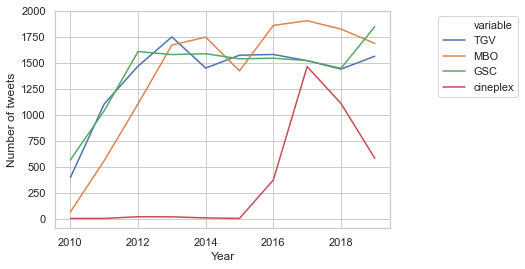

In [584]:
#Finally, let's plot our line graph again
c = sns.lineplot('year', 'value', hue='variable',
             data= melted_cinemas_ts_v2)

c.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
c.set(xlabel='Year', ylabel='Number of tweets')

We can see that TGV and GSC is more popular among malaysians from year 2010 to 2013. MBO started to have more attention from 2015 onwards. TGV and GSC are basically even through the years. We can research on the number of outlets over the years and compare it to this graph. 

Next, cineplex has near 0 tweets from 2010 to 2014. Then in 2015 they've been doing a good job increasing popularity, however their popularity took a steep drop from 2017 onwards. As a resident in Petaling Jaya, I can safely say TGV and GSC are supreme in this region and we dont really hear or go to cineplex. 

More interesting analysis can be done regarding this. e.g. amount of new outlets over the years, any major overhaul to the cinemas from cineplex direct competitors, major advertisement.

### By hour analysis ###

In [585]:
#doing the same thing as our annual analysis 
TGV_hour = df_v2.loc[(df_v2['TGV'] == 1)]
TGV_hour_to_df = TGV.groupby(['h']).count()['TGV']
TGV_hour_df = pd.DataFrame(TGV_hour_to_df)

In [587]:
GSC_hour = df_v2.loc[(df_v2['GSC'] == 1)]
GSC_hour_to_df = GSC.groupby(['h']).count()['GSC']
GSC_hour_df = pd.DataFrame(GSC_hour_to_df)

In [588]:
MBO_hour = df_v2.loc[(df_v2['MBO'] == 1)]
MBO_hour_to_df = MBO.groupby(['h']).count()['MBO']
MBO_hour_df = pd.DataFrame(MBO_hour_to_df)

In [590]:
cineplex_hour = df_v2.loc[(df_v2['cineplex'] == 1)]
cineplex_hour_to_df = cineplex.groupby(['h']).count()['cineplex']
cineplex_hour_df = pd.DataFrame(cineplex_hour_to_df)

In [591]:
frames_hour = [TGV_hour_df, MBO_hour_df, GSC_hour_df, cineplex_hour_df]
cinemas_hours = pd.concat(frames_hour, axis=1, sort=False)
cinemas_hours

,TGV,MBO,GSC,cineplex
h,,,,
0,51,22,16,5
1,111,58,46,13
2,270,174,214,26
12,1325,1792,1251,431
13,1666,1419,1948,506
14,1136,1944,1358,391
15,1791,1266,1785,361
16,1072,1088,1478,170
17,962,829,818,138


In [592]:
cinemas_hours.to_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\cinemas_hours.csv')
cinemas_hours_new = pd.read_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\cinemas_hours.csv')
cinemas_hours_new

,h,TGV,MBO,GSC,cineplex
0,0,51,22,16,5
1,1,111,58,46,13
2,2,270,174,214,26
3,12,1325,1792,1251,431
4,13,1666,1419,1948,506
5,14,1136,1944,1358,391
6,15,1791,1266,1785,361
7,16,1072,1088,1478,170
8,17,962,829,818,138
9,18,991,933,1052,209


In [593]:
#prepare the data for line plot
melted_hours = pd.melt(cinemas_hours_new, ['h'])

# Note: I've realised I've visualized this using barchart above, I guess its good to have different visualization techniques of the same data set#

[Text(0, 0.5, 'Number of tweets'), Text(0.5, 0, 'Hours')]

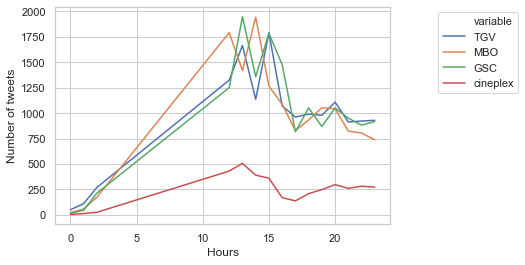

In [594]:
hour_plot = sns.lineplot('h', 'value', hue='variable',
             data= melted_hours)

hour_plot.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
hour_plot.set(xlabel='Hours', ylabel='Number of tweets')

We can see here between hours 10 to 15, Malaysians show huge interests towards cinemas on twitter. In the afternoon and late evening, the numbers declined and stagnated at around 1000 tweets for TGV, MBO and GSC. Between hours 10 - 15, they are probably planning to watch movies in the evening or actually watching movies during lunchtime (long break ;). 

We see a slight peak at 8pm, probably had their dinner and checked in at the cinemas. 

## Day of the week ##

In [470]:
df_v2.head(3)

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,h,m,s,year,month,date,TGV,GSC,MBO,cineplex
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23,watching hanna td! (@ golden screen cinemas (gsc) w/ 4 others) http://4sq.com/qwdwrv,[],0,0,18:15:33,18,15,33,2011,7,23,0,1,0,0
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23,harry potter... again!!! (@ golden screen cinemas (gsc) signature w/ @i3thchild) http://4sq.com/qkpabr,[],0,0,17:53:47,17,53,47,2011,7,23,0,1,0,0
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23,finally gonna watch hp (@ golden screen cinemas (gsc) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,16,20,12,2011,7,23,0,1,0,0


#### Convert our datetime to specific day of the week ####

In [595]:
#need to specify format first, if not datetime package will no recognize it. 
df_v2['day of week'] = pd.to_datetime(df_v2['timestamp'], format='%Y-%m-%d')

In [596]:
df_v2['dow'] =df_v2['day of week'].dt.dayofweek
df_v2.head()

,screen_name,username,user_id,tweet_id,timestamp,text,hashtags,likes,retweets,Time of day,...,s,year,month,date,TGV,GSC,MBO,cineplex,day of week,dow
0,faizulreza,Faizul Reza Zulkifli,95267015,94833042807455744,2011-07-23,Watching hanna td! (@ Golden Screen Cinemas (GSC) w/ 4 others) http://4sq.com/qWdWrv,[],0,0,18:15:33,...,33,2011,7,23,0,1,0,0,2011-07-23,5
1,ZahidMansor,Zahid Mansor,158719460,94827564509569024,2011-07-23,Harry Potter... again!!! (@ Golden Screen Cinemas (GSC) Signature w/ @i3thchild) http://4sq.com/qkPaBR,[],0,0,17:53:47,...,47,2011,7,23,0,1,0,0,2011-07-23,5
2,hariznasir,Judas | Ayeh,95462928,94804012347572224,2011-07-23,Finally gonna watch HP (@ Golden Screen Cinemas (GSC) w/ 35 others) http://4sq.com/p87vq5,[],0,0,16:20:12,...,12,2011,7,23,0,1,0,0,2011-07-23,5
3,simcom86,Simon Shu,224500513,94797119575166976,2011-07-23,Harry Potter 7 again... =) (@ Golden Screen Cinemas (GSC) w/ 20 others) http://4sq.com/qXuGgw,[],0,0,15:52:49,...,49,2011,7,23,0,1,0,0,2011-07-23,5
4,tanco,tanco,7935272,94796574017847296,2011-07-23,"I'm at Golden Screen Cinemas (GSC) (3rd Floor, IOI Mall, Jalan Puchong, Bandar Baru Puchong Jaya, Petaling Jaya) http://4sq.com/r5VxGo",[],0,0,15:50:39,...,39,2011,7,23,0,1,0,0,2011-07-23,5


In [597]:
dow_check = df_v2.dow.value_counts()
dow_check.head(10)
#looks good  
dow_check.to_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\dow.csv')

In [613]:
#Exported to excel and make some edits because my coding skills are not that great yet... 

dow_plot = pd.read_csv(r'C:\Users\aunte\Desktop\Data science\Scraping Data\Cinema\dow.csv')
dow_plot

,dow,number
0,Saturday,9716
1,Sunday,7458
2,Wednesday,7342
3,Friday,7179
4,Thursday,6104
5,Monday,4376
6,Tuesday,4093


In [614]:
#maybe histogram is a better visualization than line graph 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_plot['Date'] = pd.Categorical(dow_plot['dow'], categories=cats, ordered=True)
dow_plot = dow_plot.sort_values('Date')
dow_plot

,dow,number,Date
5,Monday,4376,Monday
6,Tuesday,4093,Tuesday
2,Wednesday,7342,Wednesday
4,Thursday,6104,Thursday
3,Friday,7179,Friday
0,Saturday,9716,Saturday
1,Sunday,7458,Sunday


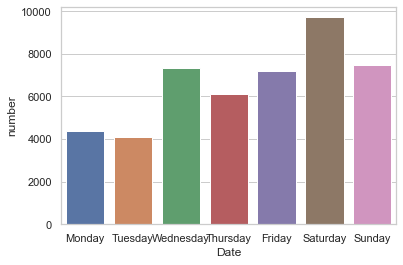

In [615]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Date", y="number", data= dow_plot)

Some insights on which day of the week Malaysians prefer to watch movies: 

1. As expected, Mondays and tuesdays have the lowest number of tweets. Everyone's depressed after having to resume work after a good weekend. 

2. Surprisingly, Wednesday, middle of the week, has the 2nd highest of amount of tweets, almost similar to sundays. Maybe Malaysians need a breather after working for 2 days. 

3. No surpise, saturday has the most amount of tweets, most Malaysians are energized from Friday night's sleep.

# Conclusion #

In this project, I scraped twitter data about cinemas specific to Malaysia. I performed data cleaning and feature engineering then proceeded with using graphs to visualize my findings. I've found that MBO cinemas has the best twitter admin. TGV and GSC are basically neck in neck in terms of popularity on Twitter. Next, I've also discovered that Malaysians likes to go the cinemas in the middle of the week. Also, Malaysians are also most actively tweeting about cinema at between 10am to 3pm. Maybe these major cinema operators can strategize their advertisement by day and by hour. 


I'm currently still waiting for my twitter developer account to be approved, then I can use official's twitter API to get a better quality dataset. Then my work can actually be used for business intelligence analytics. 

# Future Work #

Conducting sentiment analysis using VaderSentiment python package or build my earn sentiment analyzer using Machine learning models. 

Once I learn more about maching learning methods such as linear/logistic regression, naive bayes, decision tress, and linear support vector machine I can find fit and run the models